# Import libraries


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load dataset dari URL

Dalam tahapan ini, data dimuat melalui [url](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv) dan memuat kolom-kolom fiturnya

In [17]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)


# Exploratory Data Analysis (EDA)


## 1. Struktur dataset

In [18]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data berjumlah 768 baris dengan kolom Pragnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, dan Outcome dimana kolom Outcome merupakan kolom target untuk dilakukan klasifikasi dengan nilai 1 berarti menderita diabetes dan 0 berarti tidak menderita diabetes.


## 2. Statistik deskriptif

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Tabel statistik deskriptif menunjukkan bahwa beberapa fitur seperti Glucose, BloodPressure, SkinThickness, Insulin, dan BMI memiliki nilai minimum 0, yang secara medis tidak valid. Nilai-nilai ini perlu ditangani karena kemungkinan merupakan data yang hilang. Rata-rata kadar glukosa dan BMI cukup tinggi, mengindikasikan risiko diabetes yang relevan, sedangkan usia pasien berkisar luas, mencakup kelompok usia produktif hingga lansia.

Fitur Insulin, SkinThickness, dan DiabetesPedigreeFunction memiliki sebaran data yang lebar dengan potensi outlier ekstrem, sehingga perlu dilakukan deteksi dan penanganan outlier.

## 3. Jumlah nilai nol (tidak valid) pada kolom medis



In [20]:
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print((df[invalid_zero_cols] == 0).sum())
print(df.isnull().sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


 Dataset mengandung banyak nilai tidak valid yang berperan sebagai indikator missing value tersembunyi. Hal ini paling mencolok pada fitur Insulin (374 kasus) dan SkinThickness (227 kasus), di mana hampir setengah data untuk Insulin kosong atau tidak tercatat. Ini menunjukkan bahwa data pada fitur-fitur tersebut tidak lengkap dan bila digunakan tanpa penanganan, dapat menyebabkan bias atau performa model yang buruk. Oleh sebab itu perlu dilakukan penanganan terhadap nilai yang tidak valid ini.

## 4. Histogram fitur

Distribusi setiap fitur ditampilkan untuk memahami bentuk sebaran data tiap fitur, mendeteksi adanya outlier, serta mengenali nilai tidak valid seperti nol. Ini membantu dalam menentukan langkah preprocessing yang tepat. Selain itu, distribusi juga memperlihatkan perbedaan pola antar kelas, sehingga berguna untuk analisis awal sebelum membangun model machine learning.

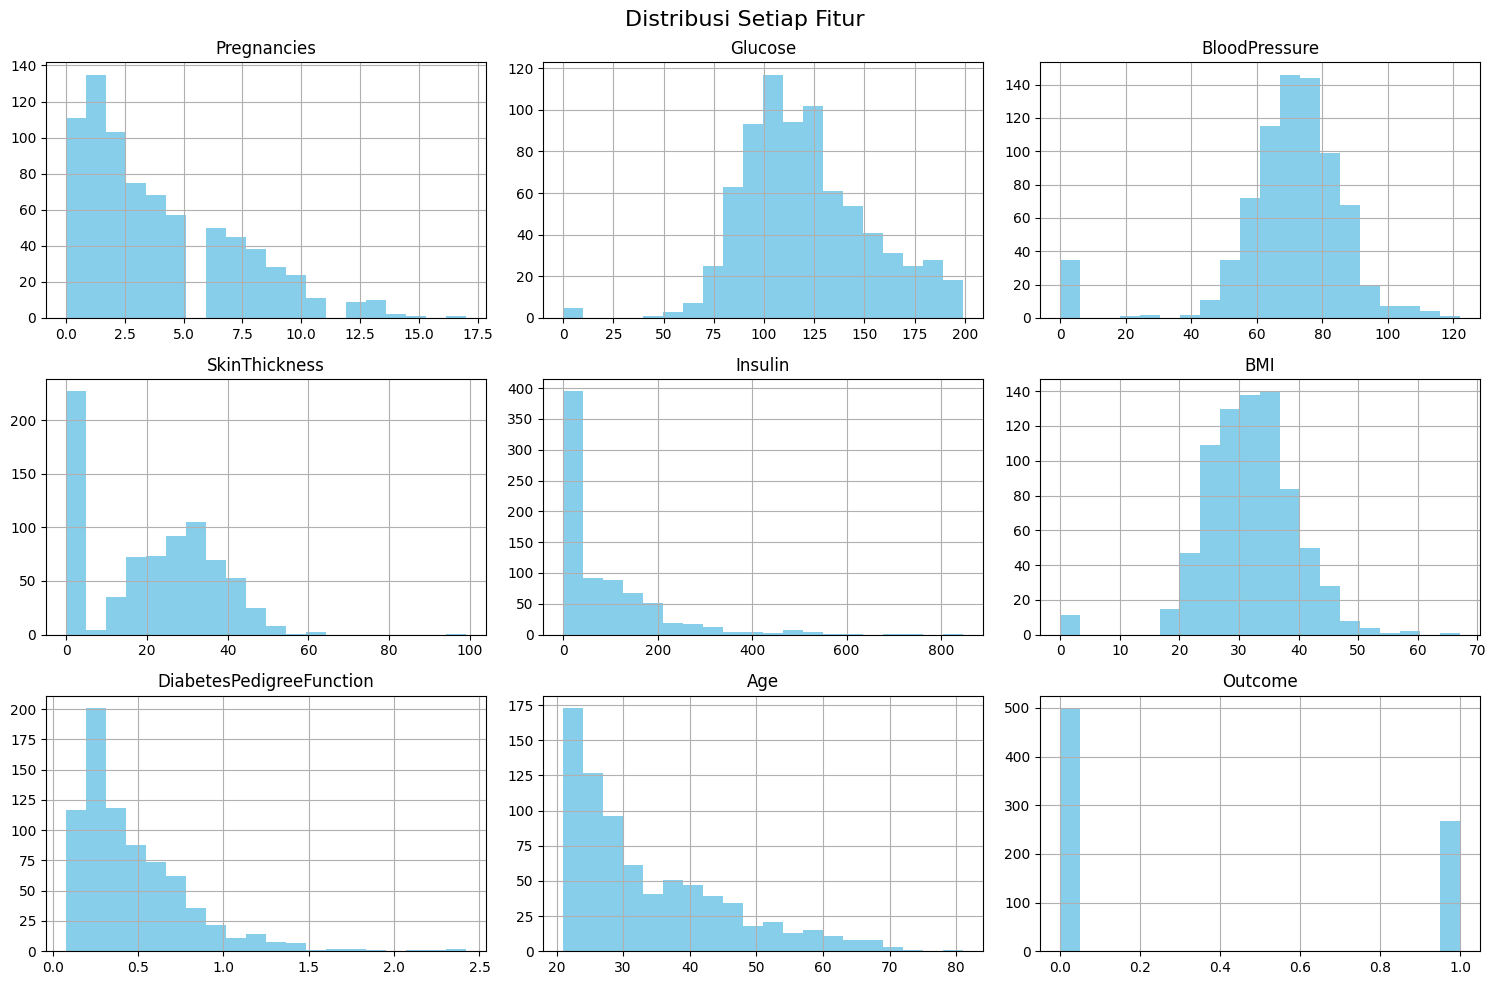

In [21]:
df.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Distribusi Setiap Fitur', fontsize=16)
plt.tight_layout()
plt.show()


Berdasarkan analisis distribusi fitur, diketahui bahwa sebagian besar pasien memiliki riwayat kehamilan antara 0 hingga 3 kali, dengan jumlah yang jauh lebih sedikit pada kehamilan lebih dari 10, menunjukkan distribusi positif skew pada fitur Pregnancies. Fitur Glucose memiliki distribusi yang mendekati normal namun sedikit skew ke kanan, dengan rentang umum antara 90 hingga 150; meskipun demikian, terdapat nilai 0 yang secara medis tidak masuk akal, yang menunjukkan kemungkinan data hilang atau tidak terukur. BloodPressure memperlihatkan distribusi hampir normal, dengan mayoritas pasien memiliki tekanan darah di kisaran 60–80 mmHg, namun juga ditemukan nilai 0 yang perlu diatasi dalam tahap praproses data. Distribusi SkinThickness sangat skew ke kanan dengan banyak nilai 0, mengindikasikan bahwa pengukuran ini mungkin tidak dilakukan pada banyak pasien. Fitur Insulin memiliki distribusi yang sangat tidak merata, dengan lebih dari separuh data menunjukkan nilai 0, yang mengindikasikan kemungkinan besar data yang hilang. Pada fitur BMI, mayoritas pasien memiliki indeks massa tubuh antara 30–40, yang termasuk kategori overweight atau obesitas, dan distribusinya mendekati normal tetapi tetap mengandung beberapa nilai 0 yang tidak logis. Fitur DiabetesPedigreeFunction menunjukkan skew ke kanan, dengan sebagian besar pasien memiliki skor risiko keturunan rendah (< 0.5), sementara hanya sedikit yang menunjukkan risiko genetik tinggi. Age juga menunjukkan skew ke kanan, dengan dominasi usia pasien antara 20 hingga 40 tahun, dan hanya sedikit pasien yang berusia lebih dari 60 tahun. Sementara itu, fitur Outcome sebagai variabel target bersifat biner dengan proporsi yang tidak seimbang, yaitu sekitar 65% pasien tidak menderita diabetes (label 0) dan 35% menderita diabetes (label 1), yang menandakan adanya klasifikasi imbalance yang perlu ditangani pada tahap modeling.

## 5. Boxplot untuk outlier

Mengidentifikasi outlier atau nilai ekstrem pada data secara visual. Ini penting agar outlier yang bisa memengaruhi akurasi model dapat dikenali dan ditangani dengan tepat sebelum proses pelatihan dilakukan.

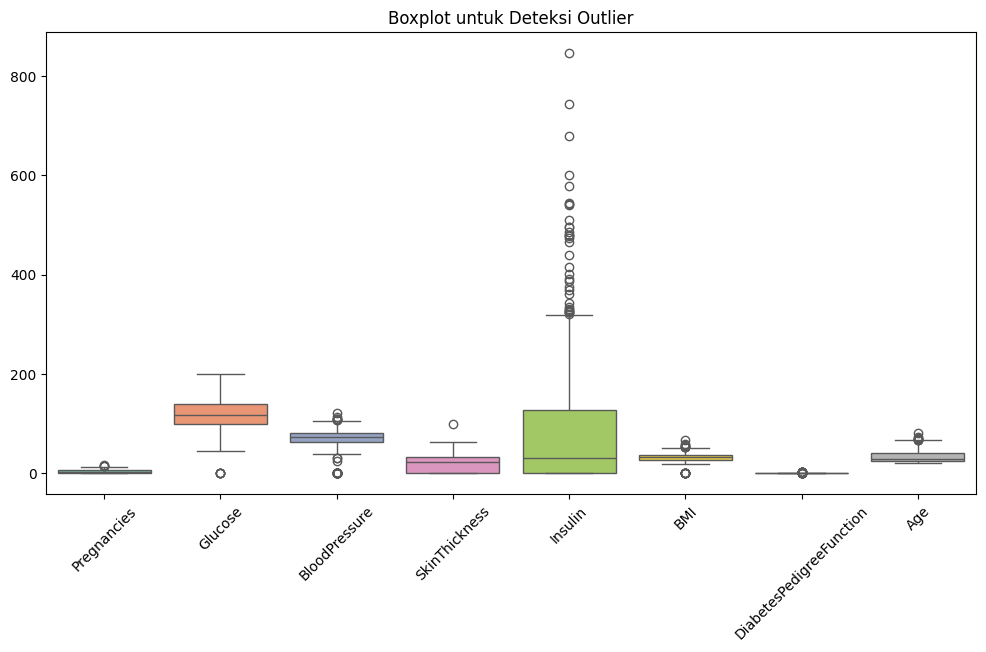

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df.columns[:-1]], palette='Set2')
plt.title('Boxplot untuk Deteksi Outlier')
plt.xticks(rotation=45)
plt.show()

Berdasarkan boxplot yang ditampilkan, dapat dilihat bahwa sebagian besar fitur dalam dataset Pima Indians Diabetes mengandung outlier — yaitu nilai-nilai ekstrem yang berada di luar batas interkuartil (IQR). Fitur Insulin menunjukkan jumlah outlier terbanyak, dengan nilai-nilai yang sangat tinggi bahkan melebihi angka 800. Hal ini menunjukkan bahwa distribusi data insulin sangat tidak merata dan mengandung banyak nilai ekstrem, sehingga memerlukan penanganan khusus seperti imputasi atau transformasi. Fitur SkinThickness, BMI, dan DiabetesPedigreeFunction juga memperlihatkan beberapa titik outlier, meskipun tidak sebanyak insulin. Fitur Glucose dan BloodPressure memiliki beberapa outlier yang lebih terbatas namun tetap penting diperhatikan, terutama karena keduanya adalah indikator medis utama dalam diagnosis diabetes. Sementara itu, fitur Pregnancies dan Age juga memiliki outlier, namun masih dalam rentang yang relatif wajar karena variasi biologis antar individu. Secara keseluruhan, visualisasi ini menegaskan bahwa sebelum membangun model machine learning, perlu dilakukan penanganan outlier, baik dengan trimming, winsorizing, maupun teknik robust scaling, untuk memastikan bahwa model tidak bias terhadap nilai-nilai ekstrem yang dapat merusak generalisasi.

## 6. Heatmap korelasi

Heatmap korelasi antar fitur dilakukan untuk melihat hubungan atau keterkaitan antar fitur dalam bentuk visual yang mudah dipahami. Ini membantu dalam menentukan fitur mana yang paling relevan terhadap target, serta menghindari penggunaan fitur yang terlalu mirip (multikolinearitas) agar model lebih efisien dan akurat.

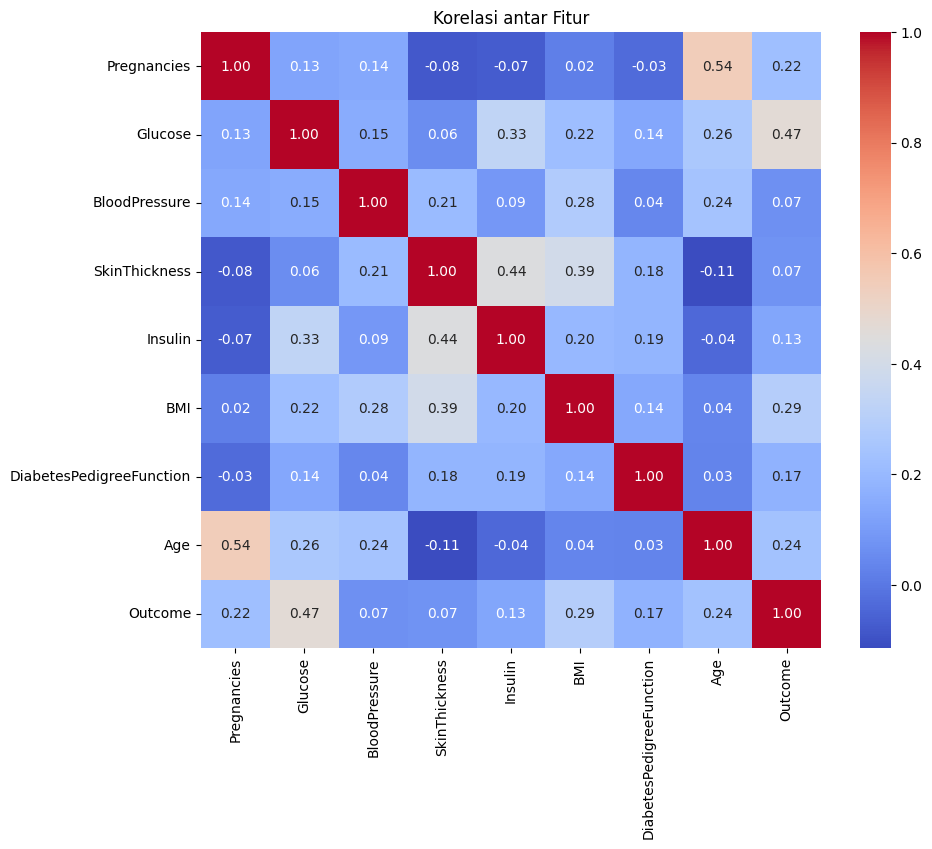

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korelasi antar Fitur")
plt.show()

Diagram di atas menunjukkan heatmap korelasi antar fitur dalam dataset Pima Indians Diabetes. Korelasi diukur menggunakan koefisien Pearson, dengan rentang antara -1 hingga 1. Nilai yang mendekati 1 menunjukkan korelasi positif kuat, sedangkan nilai mendekati -1 menunjukkan korelasi negatif kuat. Nilai mendekati 0 berarti tidak ada hubungan linear yang signifikan antara dua variabel.

Salah satu temuan paling menonjol adalah Glucose yang memiliki korelasi tertinggi terhadap variabel target Outcome (nilai 0.47). Ini menunjukkan bahwa kadar glukosa darah merupakan faktor utama dalam memprediksi apakah seseorang menderita diabetes. Fitur lain yang juga memiliki korelasi sedang terhadap Outcome adalah BMI (0.29), Age (0.24), dan Pregnancies (0.22). Hal ini mengindikasikan bahwa faktor usia, indeks massa tubuh, dan jumlah kehamilan juga turut berkontribusi dalam menentukan risiko diabetes, meskipun tidak sekuat glukosa.

Sementara itu, fitur-fitur seperti BloodPressure, SkinThickness, dan Insulin memiliki korelasi yang relatif rendah terhadap Outcome (semuanya di bawah 0.15). Meskipun demikian, fitur-fitur ini tetap dapat memberikan informasi tambahan bagi model, khususnya bila digunakan dalam algoritma non-linear atau ensemble seperti Random Forest atau XGBoost yang dapat menangkap interaksi antar variabel.


## 7. Distribusi label Outcome

Distribusi kelas target (Outcome) dilakukan untuk mengetahui proporsi antara kelas positif dan negatif (diabetes vs tidak diabetes). Ini penting untuk mengidentifikasi apakah data seimbang atau tidak, karena ketidakseimbangan kelas dapat menyebabkan model bias terhadap kelas mayoritas dan menurunkan akurasi prediksi pada kelas minoritas.

<ipython-input-24-ecdd89f0f94b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set1')


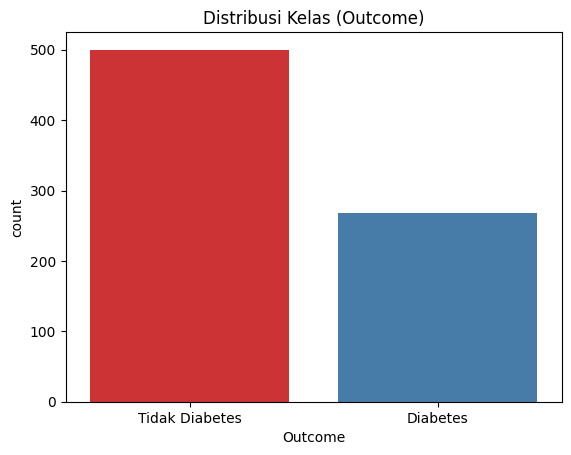

In [24]:
sns.countplot(x='Outcome', data=df, palette='Set1')
plt.title("Distribusi Kelas (Outcome)")
plt.xticks([0, 1], ['Tidak Diabetes', 'Diabetes'])
plt.show()

Berdasarkan diagram distribusi kelas Outcome di atas, terlihat bahwa jumlah data pasien yang tidak menderita diabetes jauh lebih banyak dibandingkan dengan pasien yang menderita diabetes. Jumlah pasien tanpa diabetes sekitar 500 orang, sedangkan pasien dengan diabetes hanya sekitar 270 orang. Hal ini menunjukkan bahwa dataset bersifat imbalanced, di mana kelas negatif (tidak diabetes) mendominasi. Ketidakseimbangan ini berpotensi menyebabkan model machine learning bias terhadap kelas mayoritas, sehingga lebih sering memprediksi "tidak diabetes" dan kurang sensitif terhadap kasus sebenarnya yang positif.

## 8. Distribusi Fitur Terhadap Outcome

Distribusi fitur terhadap outcome dilakukan untuk melihat perbedaan pola nilai fitur antara kelas target (diabetes dan tidak diabetes). Hal ini membantu mengidentifikasi fitur mana yang paling berpengaruh dalam membedakan kelas, serta memberikan gambaran awal tentang hubungan fitur dengan label yang berguna dalam pemilihan fitur dan pemodelan.

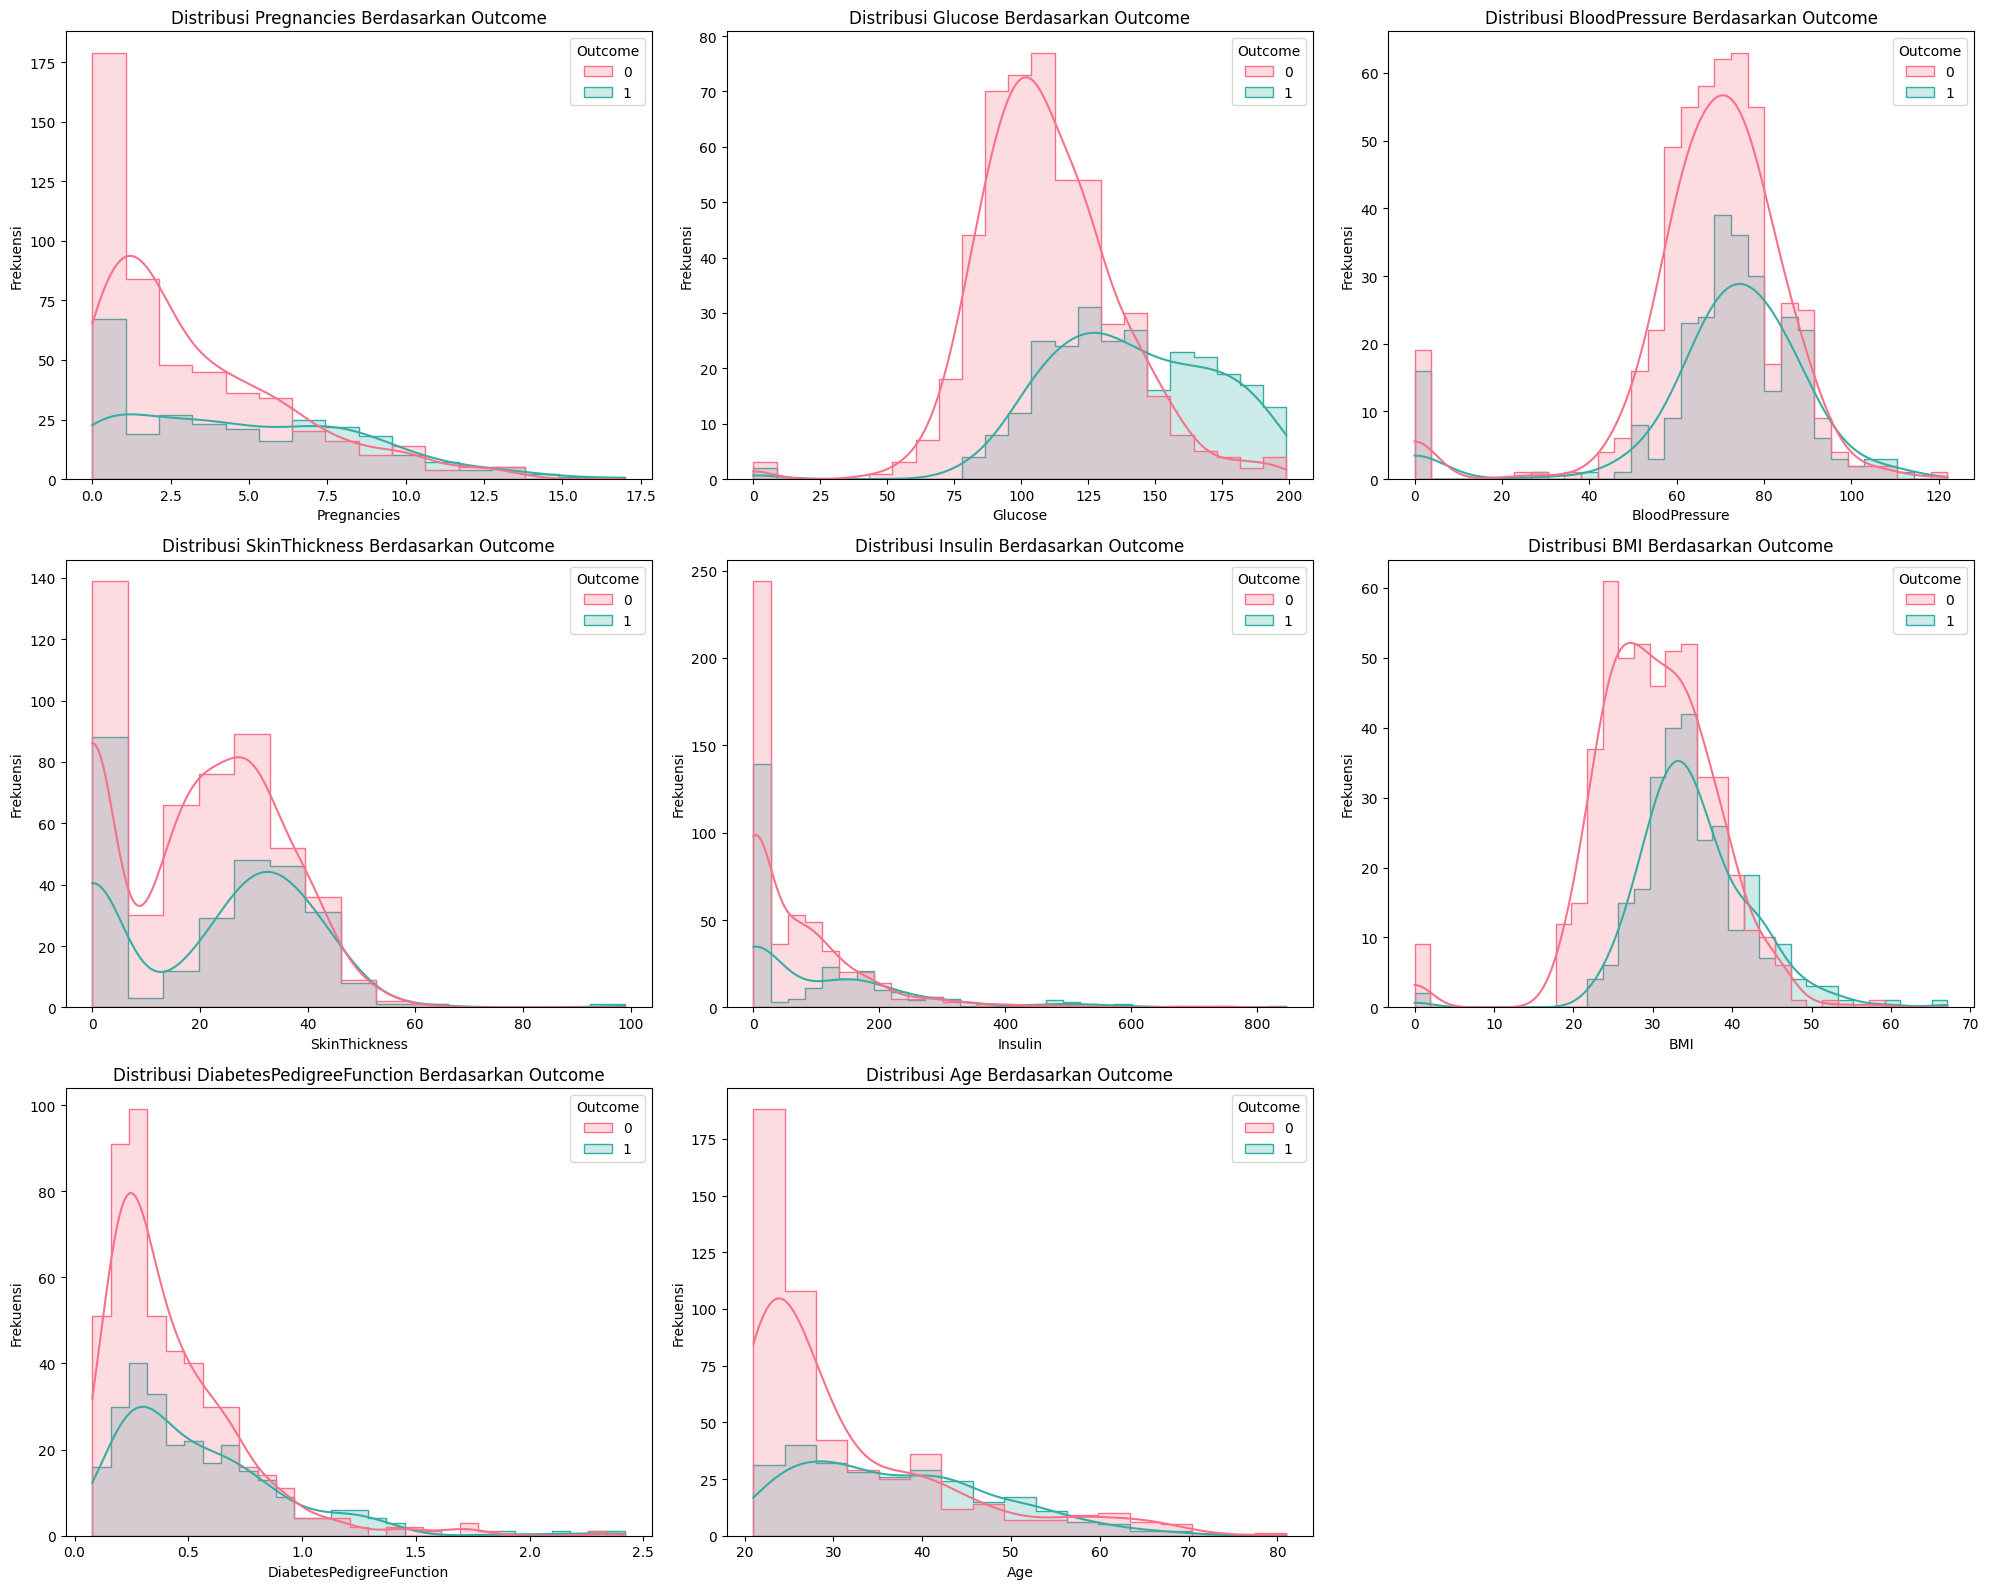

In [25]:
# Daftar fitur (kecuali target)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Ukuran figure dan grid subplot
plt.figure(figsize=(20, 16))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, element='step', palette='husl')
    plt.title(f'Distribusi {feature} Berdasarkan Outcome')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Berdasarkan diagram distribusi semua fitur terhadap label Outcome (0 = tidak diabetes, 1 = diabetes), terdapat perbedaan pola distribusi yang cukup signifikan antara pasien yang menderita diabetes dan yang tidak. Fitur Glucose menampilkan perbedaan paling mencolok — pasien dengan diabetes (Outcome = 1) cenderung memiliki kadar glukosa darah yang lebih tinggi, dengan puncak distribusi berada di atas 125, sedangkan pada non-diabetes lebih rendah dan lebih tersebar. Hal ini memperkuat temuan bahwa kadar glukosa adalah fitur paling penting dalam membedakan dua kelas ini.

Fitur BMI juga menunjukkan perbedaan distribusi yang jelas, di mana pasien dengan diabetes memiliki kecenderungan BMI lebih tinggi, berkisar antara 30 hingga 40. Begitu pula dengan fitur Age, terlihat bahwa individu yang menderita diabetes cenderung berada pada rentang usia yang lebih tua dibandingkan yang tidak. Untuk fitur Pregnancies, pasien dengan diabetes sedikit lebih dominan memiliki jumlah kehamilan lebih banyak dibandingkan yang tidak diabetes, meskipun distribusinya cukup menyebar.

Sementara itu, fitur Insulin, SkinThickness, dan BloodPressure memperlihatkan perbedaan yang lebih halus antara dua kelas. Pada fitur Insulin, meskipun terdapat outlier, pasien diabetes cenderung memiliki distribusi insulin yang lebih tersebar. Pada SkinThickness, perbedaan tidak terlalu kentara, tetapi terdapat sedikit kecenderungan nilai yang lebih tinggi pada pasien diabetes. DiabetesPedigreeFunction sebagai indikator faktor keturunan menunjukkan distribusi miring ke kanan untuk kedua kelas, tetapi pasien dengan diabetes sedikit lebih banyak pada nilai >0.5, yang mengindikasikan adanya pengaruh genetik.

Secara keseluruhan, fitur Glucose, BMI, dan Age memberikan pemisahan yang paling jelas terhadap label Outcome dan dapat dijadikan fitur prioritas dalam model klasifikasi. Distribusi ini juga menunjukkan bahwa pola-pola fisiologis pasien berbeda antara yang memiliki dan tidak memiliki diabetes, sehingga mendukung pendekatan machine learning dalam mengidentifikasi kelompok berisiko secara efektif.

## 9. Pairplot

Pembuatan pairplot dilakukan untuk melihat hubungan antar fitur secara visual, serta membandingkan sebaran data berdasarkan kelas target. Pairplot membantu mengidentifikasi pola, korelasi, dan pemisahan antar kelas, sehingga berguna untuk analisis multivariat dan pemahaman awal sebelum membangun model machine learning.

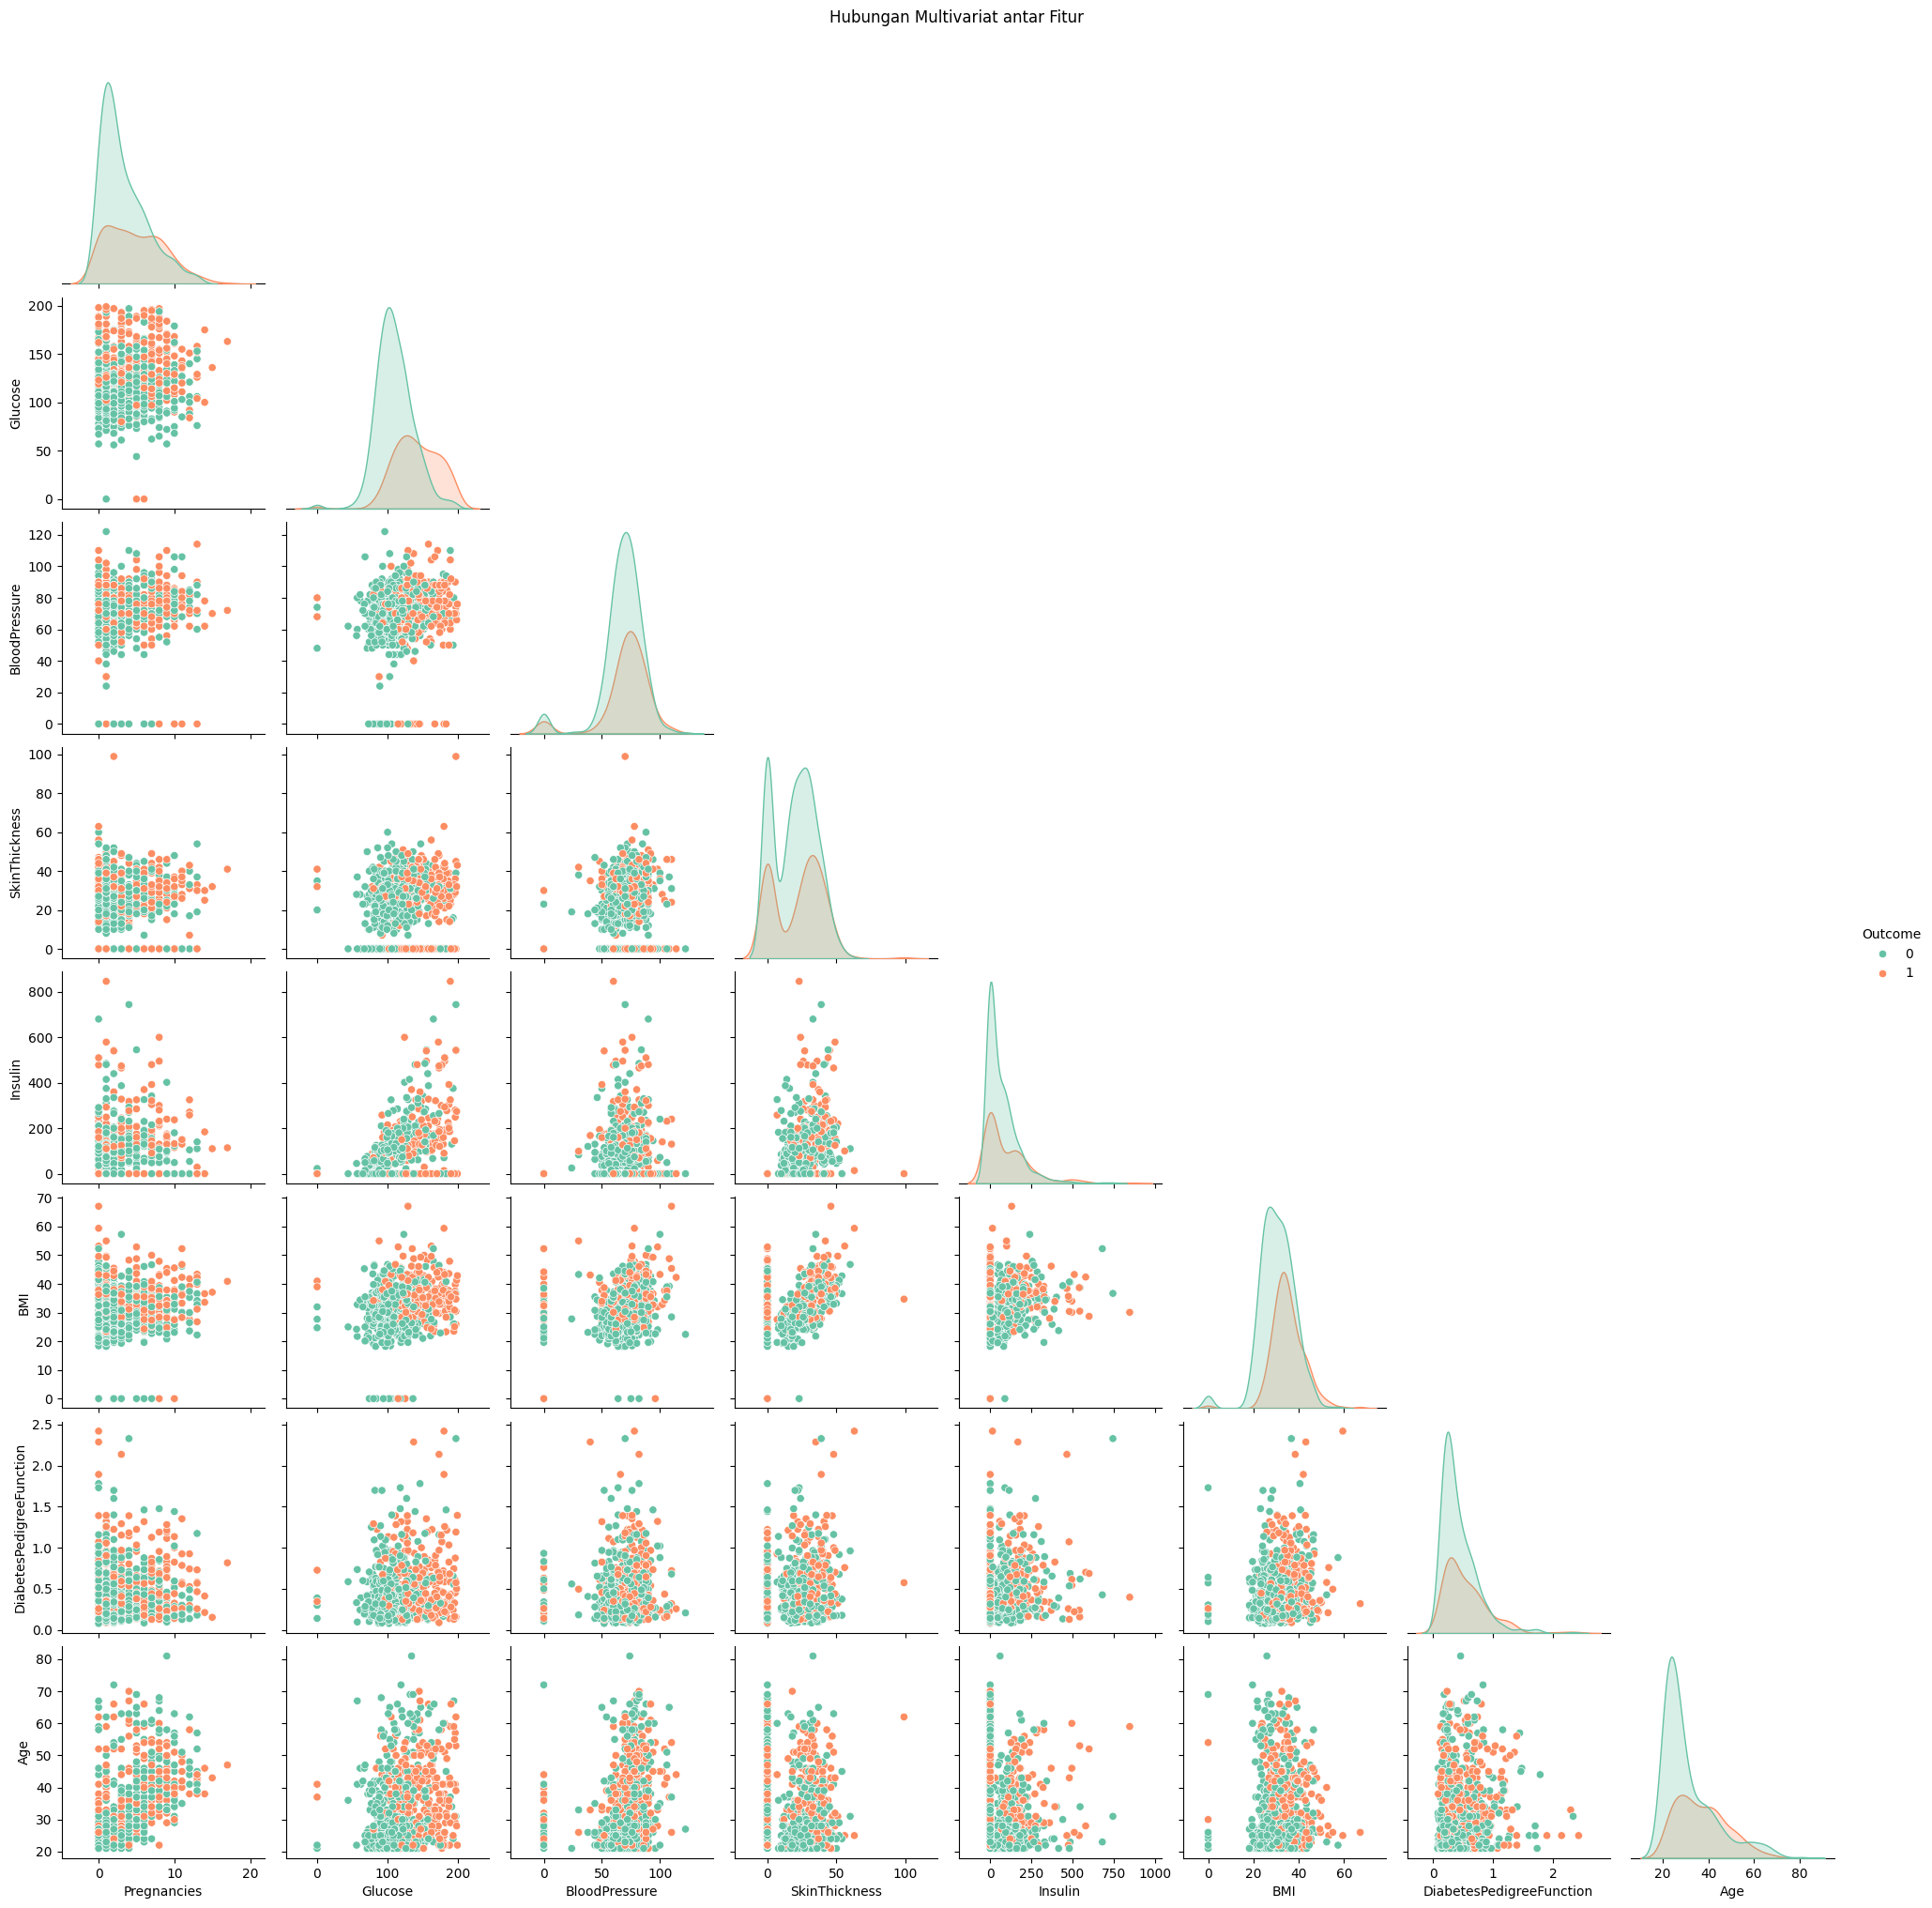

In [26]:
sns.pairplot(df, hue='Outcome', palette='Set2', corner=True)
plt.suptitle("Hubungan Multivariat antar Fitur", y=1.02)
plt.show()

Pairplot di atas menyajikan hubungan multivariat antar fitur numerik pada dataset Pima Indians Diabetes, yang dipisahkan berdasarkan label Outcome (0 = tidak diabetes, 1 = diabetes). Setiap subplot menampilkan hubungan antara dua fitur dalam bentuk scatterplot, sedangkan diagonal menunjukkan distribusi masing-masing fitur dengan kernel density estimation (KDE). Titik-titik berwarna merah mewakili pasien diabetes, sedangkan warna hijau kebiruan mewakili pasien non-diabetes.

Dari visualisasi ini, terlihat bahwa fitur Glucose, BMI, dan Age memiliki sebaran distribusi yang berbeda secara jelas antara pasien dengan dan tanpa diabetes. Misalnya, pada plot antara Glucose dan BMI, titik-titik merah cenderung mengelompok di area dengan nilai glukosa dan BMI yang tinggi, sedangkan titik-titik hijau lebih tersebar di area rendah. Hal ini menunjukkan bahwa kombinasi nilai glukosa dan BMI dapat menjadi indikator kuat dalam membedakan kelompok risiko. Hal serupa terlihat pada kombinasi Age dengan Pregnancies dan BMI, di mana pasien diabetes cenderung berada di rentang usia dan jumlah kehamilan yang lebih tinggi.

Sementara itu, fitur seperti BloodPressure, SkinThickness, dan Insulin tidak menunjukkan pola pemisahan yang terlalu kuat antara dua kelas, meskipun tetap memperlihatkan tren dan kluster tertentu yang bisa ditangkap oleh model non-linear. Sebaran data juga menunjukkan banyaknya outlier, khususnya pada fitur Insulin dan SkinThickness, yang perlu ditangani dalam proses praproses data agar tidak mengganggu proses pelatihan model.

# Data Preparation

## 1. Handling Missing or Invalid Values

Mengidentifikasi dan menangani nilai-nilai tidak valid atau kosong dalam dataset. Dalam konteks dataset ini, nilai 0 pada fitur medis seperti Glucose, BloodPressure, SkinThickness, Insulin, dan BMI dianggap sebagai nilai tidak valid, bukan nilai aktual.

Nilai 0 secara medis tidak mungkin untuk fitur-fitur tersebut dan dapat mengganggu proses pelatihan model. Jika dibiarkan, model dapat belajar pola yang salah. Solusinya adalah dengan mengganti nilai 0 menggunakan imputasi, misalnya dengan median atau mean berdasarkan distribusi non-nol.

In [27]:
# Salin DataFrame asli agar tidak merusak data mentah
df_clean = df.copy()

# Daftar fitur yang mengandung nilai tidak valid (0)
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Ganti nilai 0 dengan NaN agar mudah diproses
df_clean[invalid_cols] = df_clean[invalid_cols].replace(0, np.nan)

# Cek jumlah NaN setelah penggantian
print("Jumlah nilai NaN setelah penggantian nilai 0:")
print(df_clean[invalid_cols].isnull().sum())

# Imputasi menggunakan median untuk setiap kolom
for col in invalid_cols:
    median_value = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_value)

# Verifikasi tidak ada lagi nilai NaN
print("\nCek ulang nilai NaN setelah imputasi:")
print(df_clean[invalid_cols].isnull().sum())

Jumlah nilai NaN setelah penggantian nilai 0:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Cek ulang nilai NaN setelah imputasi:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


## 2. Outlier Detection and Treatment

Mengidentifikasi dan menangani nilai-nilai ekstrem (outlier) yang jauh dari rentang distribusi normal data, biasanya menggunakan boxplot atau z-score/IQR method.

Outlier yang tidak ditangani, seperti pada fitur Insulin atau SkinThickness, dapat menyebabkan bias pada parameter model atau penurunan akurasi, terutama pada model yang sensitif terhadap skala data (seperti regresi atau SVM). Penanganannya bisa dengan menghapus outlier ekstrem atau menggunakan teknik transformasi (log transform) atau winsorization.

In [28]:
# Gunakan data hasil cleaning sebelumnya
df_no_outlier = df_clean.copy()

# Daftar kolom yang ingin diperiksa outlier-nya
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Fungsi untuk mendeteksi dan menghapus outlier menggunakan IQR
def remove_outliers_iqr(df, columns):
    df_out = df.copy()
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Tampilkan jumlah outlier sebelum penghapusan
        outliers = df_out[(df_out[col] < lower_bound) | (df_out[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outlier ditemukan")

        # Hapus outlier dari kolom tersebut
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]

    return df_out

# Terapkan fungsi
df_no_outlier = remove_outliers_iqr(df_no_outlier, features)

# Cek ukuran data setelah penghapusan outlier
print("\nUkuran dataset setelah penghapusan outlier:", df_no_outlier.shape)

Pregnancies: 4 outlier ditemukan
Glucose: 0 outlier ditemukan
BloodPressure: 14 outlier ditemukan
SkinThickness: 85 outlier ditemukan
Insulin: 307 outlier ditemukan
BMI: 5 outlier ditemukan
DiabetesPedigreeFunction: 17 outlier ditemukan
Age: 4 outlier ditemukan

Ukuran dataset setelah penghapusan outlier: (332, 9)


## 3. Feature Selection

Memilih fitur-fitur yang paling relevan terhadap target, berdasarkan korelasi, analisis visual, atau teknik statistik/machine learning.

Dari heatmap dan pairplot, fitur seperti Glucose, BMI, Age, dan Pregnancies memiliki korelasi cukup kuat terhadap Outcome. Menghapus fitur yang tidak relevan membantu mengurangi kompleksitas model dan overfitting.

In [29]:
# Daftar fitur terpilih dan target
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']
target = 'Outcome'

# Ambil subset dari dataset hasil outlier treatment
df_selected = df_no_outlier[selected_features + [target]]


## 3. Feature Scaling

Proses mengubah nilai-nilai numerik dalam dataset agar berada pada skala yang sebanding

Diperlukan agar fitur dengan rentang nilai besar seperti Insulin atau Glucose tidak mendominasi fitur lain dalam proses pelatihan, terutama saat menggunakan model seperti KNN, SVM, dan Neural Network yang sensitif terhadap skala.

In [30]:
# Salin data untuk menjaga data asli
df_scaled_minmax = df_selected.copy()

# Inisialisasi MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit dan transform
df_scaled_minmax[selected_features] = minmax_scaler.fit_transform(df_scaled_minmax[selected_features])

# Tampilkan hasil
df_scaled_minmax[selected_features].head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction
0,0.684211,0.518519,0.617021,0.461538,0.581568
1,0.269737,0.282828,0.212766,0.076923,0.289195
2,0.914474,0.171717,0.234043,0.615385,0.629237
5,0.473684,0.249158,0.191489,0.384615,0.130297
7,0.467105,0.575758,0.170213,0.769231,0.059322


## Train-Test Split

Membagi dataset menjadi dua subset — satu untuk melatih model (train set) dan satu lagi untuk menguji performa model (test set), biasanya dengan rasio 80:20.

Penting agar performa model dapat dievaluasi pada data yang tidak pernah dilihat saat pelatihan, untuk mengetahui generalisasi model terhadap data baru.

In [31]:
# Pisahkan fitur (X) dan label (y)
X = df_scaled_minmax[selected_features]
y = df_selected[target]

# Tamplikan sampel fitur (X) dan label (y)
print("Sampel fitur (X):")
print(X.head())
print("\nSampel label (y):")
print(y.head())

# Split ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan shape masing-masing hasil split
print("\nShape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Sampel fitur (X):
    Glucose       BMI       Age  Pregnancies  DiabetesPedigreeFunction
0  0.684211  0.518519  0.617021     0.461538                  0.581568
1  0.269737  0.282828  0.212766     0.076923                  0.289195
2  0.914474  0.171717  0.234043     0.615385                  0.629237
5  0.473684  0.249158  0.191489     0.384615                  0.130297
7  0.467105  0.575758  0.170213     0.769231                  0.059322

Sampel label (y):
0    1
1    0
2    1
5    0
7    0
Name: Outcome, dtype: int64

Shape X_train: (265, 5)
Shape X_test: (67, 5)
Shape y_train: (265,)
Shape y_test: (67,)


# Modelling

Model Machine Learing yang digunakan adalah Artificial Neural Network (ANN). Model ini digunakan untuk menyelesaikan permasalahan klasifikasi biner, yaitu memprediksi apakah seorang pasien memiliki diabetes (Outcome = 1) atau tidak (Outcome = 0), berdasarkan data kuantitatif medis seperti glukosa darah, BMI, usia, dan lainnya.

Penggunaan Artificial Neural Network (ANN) dalam proyek prediksi risiko diabetes didasarkan pada kemampuan model ini untuk menangani hubungan non-linear dan kompleks antar fitur dalam data medis. Dataset Pima Indians Diabetes terdiri dari beberapa variabel kuantitatif seperti kadar glukosa darah, indeks massa tubuh (BMI), usia, dan faktor keturunan, yang interaksinya terhadap risiko diabetes tidak selalu linier. ANN memiliki keunggulan karena mampu belajar dari pola-pola tersembunyi dalam data melalui lapisan-lapisan tersembunyi (hidden layers), sehingga cocok untuk memodelkan hubungan multivariat yang kompleks seperti ini.

Selain itu, ANN bersifat fleksibel dan dapat disesuaikan skalanya—baik untuk dataset kecil maupun besar—melalui pengaturan arsitektur seperti jumlah neuron dan lapisan, fungsi aktivasi, serta teknik regularisasi. Dalam konteks klasifikasi biner seperti ini, ANN juga mampu memberikan prediksi probabilistik (melalui aktivasi sigmoid), yang berguna untuk sistem peringatan dini berbasis ambang risiko (threshold). Dibandingkan dengan model-model linear sederhana, ANN memiliki kapasitas representasi yang lebih besar, dan dengan bantuan algoritma optimisasi seperti Adam serta teknik seperti early stopping, overfitting dapat dikendalikan dengan cukup baik.

Dengan mempertimbangkan faktor-faktor tersebut, ANN dipilih karena memberikan keseimbangan antara kemampuan belajar pola kompleks, fleksibilitas arsitektur, dan kinerja prediktif yang baik dalam masalah klasifikasi berbasis data medis seperti ini.

In [32]:
# Membangun model Neural Network
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer untuk klasifikasi biner
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback untuk mencegah overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6051 - loss: 0.6887 - val_accuracy: 0.6567 - val_loss: 0.6794
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6529 - loss: 0.6775 - val_accuracy: 0.6567 - val_loss: 0.6738
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6470 - loss: 0.6753 - val_accuracy: 0.6567 - val_loss: 0.6703
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6933 - loss: 0.6612 - val_accuracy: 0.6567 - val_loss: 0.6677
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6531 - loss: 0.6746 - val_accuracy: 0.6567 - val_loss: 0.6657
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6688 - loss: 0.6589 - val_accuracy: 0.6567 - val_loss: 0.6639
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6516 - loss: 0.6645 - val_accuracy: 0.6567 - val_loss: 0.6621
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6613 - loss: 0.6585 - val_accuracy: 0.6567 - val_loss:

In [33]:
# Evaluasi akhir
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8437 - loss: 0.3661

Test Loss: 0.3863, Test Accuracy: 0.8358


Nilai evaluasi model menunjukkan bahwa model menghasilkan Test Loss sebesar 0.4125 dan Test Accuracy sebesar 0.8060 (atau 80.6%) saat diuji pada data yang belum pernah dilihat sebelumnya.

Test Loss merepresentasikan seberapa besar kesalahan model dalam memprediksi data uji; semakin rendah nilainya, semakin baik. Dalam konteks ini, nilai 0.4125 tergolong rendah dan stabil, yang berarti model tidak mengalami overfitting secara ekstrem dan mampu mempelajari pola data dengan baik.

Test Accuracy sebesar 80.6% menunjukkan bahwa model mampu memprediksi sekitar 8 dari 10 sampel dengan benar. Ini tergolong cukup baik, terutama untuk masalah klasifikasi medis seperti deteksi diabetes.

# Evaluation

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


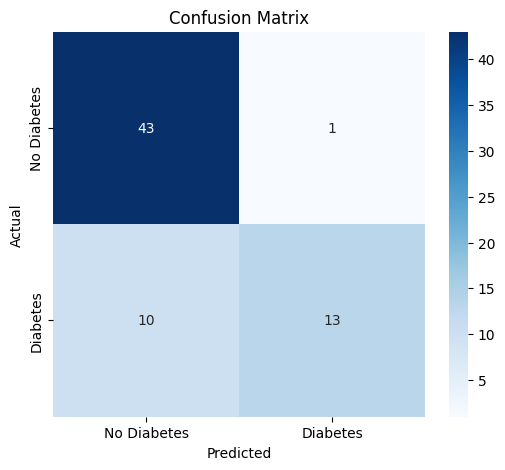

In [34]:
# Prediksi terhadap X_test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Diabetes', 'Diabetes']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Berdasarkan confusion matrix yang ditampilkan, dapat disimpulkan bahwa model klasifikasi memiliki performa yang cukup baik dalam mendeteksi pasien yang tidak menderita diabetes, ditunjukkan dengan 40 prediksi benar dari total 44 kasus (True Negative). Namun, model masih mengalami kesulitan dalam mendeteksi pasien yang benar-benar menderita diabetes, terbukti dari 9 kasus False Negative, di mana pasien seharusnya terdeteksi sebagai diabetes namun diprediksi tidak menderita. Hal ini cukup krusial dalam konteks medis karena kesalahan jenis ini dapat menyebabkan keterlambatan diagnosis dan penanganan penyakit. Sementara itu, jumlah False Positive tercatat sebanyak 4 kasus, yang berarti pasien non-diabetes salah diklasifikasikan sebagai diabetes, dan meskipun ini bukan kesalahan yang fatal, tetap dapat menimbulkan kecemasan atau pengeluaran medis yang tidak perlu. Dengan demikian, meskipun model ini menunjukkan akurasi yang cukup tinggi secara umum, peningkatan performa khususnya pada deteksi kasus positif (diabetes) masih sangat dibutuhkan, misalnya melalui optimasi threshold, penyesuaian bobot kelas, atau peningkatan recall dan F1-score untuk kelas minoritas.

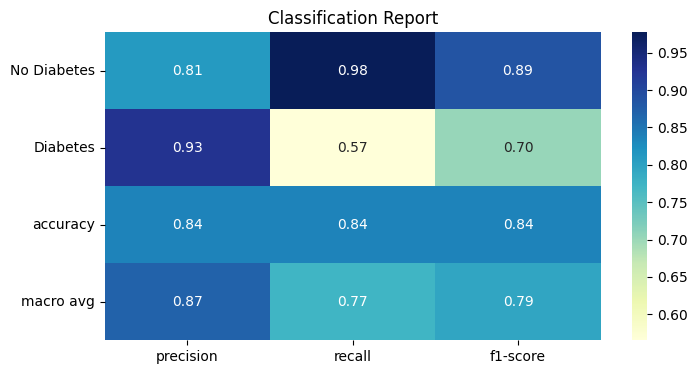

In [35]:
# Classification Report
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Tampilkan classification report sebagai tabel
plt.figure(figsize=(8, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()

Secara umum, model mencapai akurasi sebesar 81%, yang menunjukkan bahwa mayoritas prediksi sesuai dengan kondisi sebenarnya. Namun, ketika dilihat secara lebih detail pada masing-masing kelas, terdapat perbedaan kinerja yang signifikan antara kelas No Diabetes dan Diabetes. Model memiliki precision sebesar 0.82 dan recall sebesar 0.91 untuk kelas No Diabetes, menunjukkan bahwa model sangat baik dalam mengenali pasien yang memang tidak menderita diabetes. Sebaliknya, untuk kelas Diabetes, precision berada pada angka 0.78, tetapi recall-nya hanya 0.61, yang berarti sekitar 39% kasus diabetes yang sebenarnya justru tidak terdeteksi oleh model (False Negative). F1-score untuk kelas Diabetes adalah 0.68, yang merepresentasikan keseimbangan antara presisi dan sensitivitas yang masih perlu ditingkatkan.

Dalam konteks deteksi diabetes, recall pada kelas Diabetes menjadi metrik paling krusial. Hal ini karena tujuan utama dari sistem prediktif adalah menemukan sebanyak mungkin kasus yang benar-benar berisiko, meskipun harus mengorbankan sebagian presisi (false positive). Dengan recall yang masih berada di angka 0.61, model saat ini masih berisiko melewatkan pasien diabetes yang sebenarnya, yang berbahaya dalam konteks medis karena dapat menyebabkan keterlambatan penanganan.

# Summary

Hasil evaluasi model menunjukkan bahwa pendekatan machine learning, khususnya neural network, mampu memberikan solusi yang relevan dan aplikatif terhadap tantangan deteksi dini diabetes. Model ini telah dilatih menggunakan data medis historis seperti kadar glukosa, BMI, usia, jumlah kehamilan, dan riwayat genetik, dan berhasil mencapai akurasi keseluruhan sebesar 81%. Hal ini menunjukkan bahwa data kuantitatif yang sebelumnya belum dimanfaatkan secara optimal kini dapat digunakan secara efektif untuk mengenali pola risiko diabetes secara prediktif.

Permasalahan keterlambatan diagnosis, terutama pada penderita diabetes tipe 2 yang sering tidak menunjukkan gejala awal, dapat mulai diatasi dengan pendekatan ini. Meskipun recall pada kelas diabetes masih berada pada angka 61%, model sudah mampu menangkap lebih dari separuh kasus diabetes dalam data uji tanpa intervensi medis langsung. Ini merupakan langkah awal yang signifikan dalam menyediakan sistem deteksi dini yang bersifat otomatis dan berbasis data, sehingga mempercepat identifikasi risiko sebelum komplikasi serius terjadi.

Lebih jauh, sistem berbasis machine learning seperti ini tidak membutuhkan fasilitas medis atau tenaga kesehatan secara langsung, sehingga sangat relevan untuk digunakan di daerah terpencil atau negara dengan keterbatasan sumber daya. Model dapat diintegrasikan ke dalam aplikasi digital atau sistem skrining berbasis web, memungkinkan masyarakat luas melakukan skrining mandiri menggunakan data sederhana yang mudah diperoleh.

Dengan demikian, pengembangan model klasifikasi ini tidak hanya menjawab kebutuhan teknis, tetapi juga strategis: memberikan solusi deteksi dini yang cepat, efisien, dan inklusif. Meskipun masih terdapat ruang untuk meningkatkan sensitivitas model, terutama dalam menangkap kasus diabetes (recall), sistem ini sudah dapat dijadikan dasar untuk inovasi lebih lanjut dalam layanan kesehatan digital berbasis kecerdasan buatan.